# Valuing Storage of Wind Power

In this notebook we study the solution of parabolic partial differential equations
 used to model electricity storage on a deregulated energy market. 
 As governments around the world commit to increase the level of renewable energy
 they produce, wind power has come to the forefront as one of the most viable options.
However, wind power does not come without its problems. Due to the intermittent
  nature of the wind, we may have a situation where the
  wind blows at the wrong time causing the electricity generated to be discarded.
  An obvious solution would seem to be the installation of batteries alongside
  the generators to store energy when there is a surplus so that it may be released when there is a 
  deficit. There are many reasons (beyond the scope of this project) as to why 
  this is not currently economically viable on a large scale in the UK, but
  non the less it will become important in the future as more and more energy is generated
  using wind.
  The simplified problem in this project investigates the value of installing a battery alongside a 
  wind power generator in order to take advantage of a surplus in production to 
  meet commitments if there is a deficit in production.




  Let the variable $Q\in[0,Q_{max}]$ denote the energy stored within the battery, and $X\in(-\infty,\infty)$
  denote the surplus of electricity (energy generated minus energy demanded), then the 
  value of a battery $V(X,Q,t)$ is a function of the current state of both of these variables at time $t$. 
  Now assume that $X$ follows a random walk through time and satisfies the following stochastic
  differential equation (SDE):
  \begin{equation}
    dX = \alpha(X,t)dt + \beta(X,t) dW
  \tag{1}
  \end{equation}
  where $\alpha$ and $\beta$ are functions chosen to best fit data, and $dW$ is a standard Wiener process.
  We choose for simplicity that $\alpha(X,t)=0$ and $\beta(X,t)=\sigma$ where $\sigma$ is a given constant.
  This will ensure that $V(X,Q,t)=V(X,Q)$ or that the solution is time independent.
  Then we may also look at how energy flows into and out of the battery, let the change in $Q$ over an instant be defined
  as
  \begin{equation}
    dQ = \left\{ \begin{array}{ccc}
	  0 & \text{if} & X<0 \quad \text{and} \quad Q=0 \\
	0 & \text{if} & X>0 \quad\text{and}\quad Q=Q_{max} \\
	Xdt & & \text{otherwise} 
	\end{array}
	  \right. .
  \tag{2}
  \end{equation}
  This says that the battery cannot discharge if already empty, or charge if already full.
  Further, if $X<0$ (and $Q>0$), then we have a deficit of energy and we may sell the energy discharged
  $|dQ|$ onto the market at the price $p$. Then the change in value of our option over an instant is given by
  \begin{equation}
  dV = -p\min(dQ,0)
  \tag{3}.
  \end{equation}

  Then by using It\^{o}'s lemma and combining equations (1), (2) 
  and (3) it can be shown (see \cite{howell2010-storage}) that the net present value of the 
  battery is described by the following PDE:
  \begin{equation}
  X\frac{\partial V}{\partial Q} + \frac12 \sigma^2 \frac{\partial^2 V}{\partial X^2} -rV -p\min(X,0) = 0
  \end{equation}
  subject to the conditions
  \begin{align*}
  V=0 &  \quad \quad  \text{as} \quad X\rightarrow \infty \\
  V=pQ &  \quad  \quad \text{as} \quad X\rightarrow -\infty \\
  \frac12 \sigma^2 \frac{\partial^2 V}{\partial X^2} -rV = 0 & \quad  \quad  \text{if} \quad X<0 \quad \text{and} \quad Q=0\\
  \frac12 \sigma^2 \frac{\partial^2 V}{\partial X^2} -rV = 0 & \quad  \quad \text{if} \quad X>0 \quad \text{and} \quad Q=Q_{max}
  \end{align*}

#### Figure 1: The domain and boundaries on which the PDE must be solved.
![The domain and boundaries on which the PDE must be solved.](./images/storageDomain.png)



  Now in order to solve the PDE we must divide the domain into two regions (see figure 1),
  one ($X\leq0$ or $A$) in which we can solve upwards, and the other  ($X\geq0$ or $B$) in which we can solve downwards. Along 
  the boundary $X=0$ 
  the solutions must be matched. 

## Fully implicit scheme

  Let us discretise the problem so that 
  $$
  X_i = (i-N)\Delta X \quad \quad \Delta X = \frac{X_{\infty}}{N} \quad \quad Q_j = j\Delta Q \quad \quad \Delta Q = \frac{Q_{max}}{M}
  $$
  where
  $$
  0\leq i \leq 2N \quad \quad \text{and} \quad \quad 0\leq j \leq M
  $$
  and the value function $v_{i,j} = V(X_i,Q_j)$. 

  The fully implicit method we propose to solve this problem is an iterative scheme
  where we solve in the region $A$ using a guess for the solution in $B$, and then solve in the 
  region $B$ using a guess for the solution in $A$. So to complete one iteration
  involves sweeping across $A$ and then $B$. We use $q$ to denote the 
  value at the $q$th iteration, or $v_{i,j}^{q}$, and $q+1/2$ indicates we are halfway through one
  iteration. 

### Region $A$

  Then the scheme for $v$ in the region $A$ is as follows. Firstly, when $j=0$ and $0<i<N$ we have
  \begin{equation}
  \frac12 \sigma^2 {v_{i-1,0}^{q+1/2} -2v_{i,0}^{q+1/2} +
  v_{i+1,0}^{q+1/2} \over \Delta_X^2} -rv_{i,0}^{q+1/2} = 0 . 
  \tag{4}
  \end{equation}
  and then on the boundaries $i=0$ and $i=N$ when $j=0$ we get
  \begin{equation}
  v_{0,0}^{q+1/2}=0, \quad \quad v_{N-1,0}^{q+1/2} -\left(2+\frac{r\Delta_X^2}{\frac12\sigma^2}\right)v_{N,0}^{q+1/2}= - v_{N+1,0}^{q}. 
  \tag{5}
  \end{equation}
  Here we must _guess_ the value of the system where $i>N$, hence the $q$ and this guess should simply be the most up-to-date value.
  The unknown values $v_{i,0}^{q+1/2}$ are the ones we are solving for at this stage.

  Next if we are in the discharging region $A$ then we have $0<j\leq M$ and $0<i<N$ and the scheme is
  \begin{equation}
  X_i{v_{i,j}^{q+1/2}-v_{i,j-1}^{q+1/2} \over \Delta_Q} + \frac12 \sigma^2 {v_{i-1,j}^{q+1/2} -2v_{i,j}^{q+1/2} +
  v_{i+1,j}^{q+1/2} \over \Delta_X^2} -rv_{i,j}^{q+1/2} = pX_i . 
  \tag{6}
  \end{equation}
  
  If we rearrange (6)
  with $\kappa_i=\sigma^2 \Delta_Q /(2X_i\Delta_X^2)$ and $\rho_i=r\Delta_Q/X_i$we have 
  \begin{equation}
  \kappa_i v_{i-1,j}^{q+1/2} +(1-2\kappa_i-\rho_i)v_{i,j}^{q+1/2} + \kappa_i v_{i+1,j}^{q+1/2} = 
  v_{i,j-1}^{q+1/2} + p\Delta_Q,  \quad 0 <i< N , \tag{7}
  \end{equation}
  
  In addition approximation of the boundary conditions with $\kappa_N=\sigma^2 /(2\Delta_X^2)$ 
  gives
  \begin{equation}
  v_{0,j}^{q+1/2}=Q_j, \quad \quad \kappa_N v_{N-1,j}^{q+1/2} -(2\kappa_N + r) v_{N,j}^{q+1/2}= -\kappa_N v_{N+1,j}^{q}, \tag{8}
  \end{equation}
  
  The discrete equations (4), (5), 
  (7), (8) form 
  tridiagonal systems of equations for each $0\leq j\leq M$. So long as we solve first for $j=0$ 
  then we may move upwards from $j=1$ up to $j=M$ so that
  all the values on the right hand side of the equations may be treated as knowns.


### Region $B$

  Then the scheme for $v$ in the region $B$ is as follows. Firstly, when $j=M$ and $N<i<2N$ the battery is full
  and can no longer be charged so we have
  \begin{equation}
  \frac12 \sigma^2 {v_{i-1,M}^{q+1} -2v_{i,M}^{q+1} +
  v_{i+1,M}^{q+1} \over \Delta_X^2} -rv_{i,M}^{q+1} = 0 . 
  \tag{9}
  \end{equation}
  and then on the boundary for $j=M$ we get
  \begin{equation}
  -\left(2+\frac{r\Delta X^2}{\frac12\sigma^2}\right)v_{N,M}^{q+1} + v_{N+1,M}^{q+1} = - v_{N-1,M}^{q+1/2} , \quad \quad v_{2N,M}^{q+1}=0.
  \tag{10}
  \end{equation} 

  Next if we are in the charging region of $B$ then we have $M>j\geq 0$ and $N<i<2N$ and the scheme is
  \begin{equation}
  X_i{v_{i,j+1}^{q+1}-v_{i,j}^{q+1} \over \Delta_Q} + \frac12 \sigma^2 {v_{i-1,j}^{q+1} -2v_{i,j}^{q+1} +
  v_{i+1,j}^{q+1} \over \Delta_X^2} -rv_{i,j}^{q+1} = 0 . 
  \tag{11}
  \end{equation}
  
  If we rearrange (11)
  with $\kappa_i=\sigma^2 \Delta_Q /(2X_i\Delta_X^2)$ and $\rho_i=r\Delta_Q/X_i$we have 
  \begin{equation}
  \kappa_i v_{i-1,j}^{q+1} -(1+2\kappa_i+\rho_i)v_{i,j}^{q+1} + \kappa_i v_{i+1,j}^{q+1} = 
  -v_{i,j+1}^{q+1},  \quad N <i< 2N , \tag{12}
  \end{equation}
  
  In addition approximation of the boundary conditions with $\kappa_N=\sigma^2 /(2\Delta_X^2)$  gives
  \begin{equation}
  -(2\kappa_N + r) v_{N,j}^{q+1} + \kappa_N v_{N+1,j}^{q+1} = -\kappa_N v_{N-1,j}^{q+1/2},\quad \quad v_{2N,j}^{q+1}=0, 
  \tag{13}
  \end{equation}
  
  The discrete equations (9), (10), 
  (12), (13) form 
  tridiagonal systems of equations for each $M>j\geq 0$. So long as we solve for $j=M$ first we can then move
  downwards from $j=M-1$ down to $j=0$ treating the right hand side of the equations as knowns ($v_{i,j+1}^{q+1}$).

  In order to fully solve the problem you must iterate until your solution has converged, or $v_{i,j}^{q+1}=v_{i,j}^{q}$ 
  for all $i$ and $j$.



In [1]:
#include "msc_project_storage.hpp"

In [2]:
// load parameters and storage
int M=10;
int N=25;
double Qmax=1.;
double Xmax=25.;
std::vector<double> Q(M+1),X(2*N+1);

double dX = Xmax/N;
double dQ = Qmax/M;
for(int i=0;i<=2*N;i++)
    X[i] = -Xmax + i*dX;
for(int j=0;j<=M;j++)
    Q[j] = j*dQ;

double r=0.01;
double p=1;
double sigma=0.5;

std::vector<std::vector<double>> v(2*N+1,std::vector<double>(M+1,0.));


In [3]:
// SOLVE FOR REGION A

// solve at j=0 according to (4) and (5)
{
    // store tridiagonal system
    vector<double> a(N+1),b(N+1),c(N+1),d(N+1);
    // constant kappa after rearranging (4)
    double kappa=2.*r*dX*dX/sigma/sigma;
        
    a[0]=0.;b[0]=1.;c[0]=0.;d[0]=0.;
    for(int i=1;i<N;i++)
    {
        a[i]=1.;b[i]=-2.-kappa;c[i]=1;d[i]=0;
    }
    a[N]=1.;b[N]=-2.-kappa;c[N]=0.;d[N]=-v[N+1][0];
    
    // solve
    MATH60082::thomasSolve(a,b,c,d);
    // update v with solution
    for(int i=0;i<=N;i++)
        v[i][0]=d[i];
}

In [4]:
// solve at j=1 to M according to (7) and (8)
for(int j=1;j<=M;j++)
{
    // store tridiagonal system
    vector<double> a(N+1),b(N+1),c(N+1),d(N+1);
        
    a[0]=0.;b[0]=1.;c[0]=0.;d[0]=Q[j];
    for(int i=1;i<N;i++)
    {
        double kappa_i=sigma*sigma*dQ/dX/dX/2./X[i];
        double rho_i=r*dQ/X[i];
        a[i]=kappa_i;b[i]=1.-2.*kappa_i-rho_i;c[i]=kappa_i;d[i]=v[i][j-1]+p*dQ;
    }
    // constant kappa after rearranging 
    double kappa=2.*r*dX*dX/sigma/sigma;
    a[N]=1.;b[N]=-2.-kappa;c[N]=0.;d[N]=-v[N+1][j];
    
    // solve
    MATH60082::thomasSolve(a,b,c,d);
    // update v with solution contained in d
    for(int i=0;i<=N;i++)
        v[i][j]=d[i];
}

In [5]:
// SOLVE FOR REGION B

// solve at j=M according to (9) and (10)
{
    // store tridiagonal system
    vector<double> a(N+1),b(N+1),c(N+1),d(N+1);
    // constant kappa after rearranging (4)
    double kappa=2.*r*dX*dX/sigma/sigma;
        
    a[0]=0.;b[0]=-2.-kappa;c[0]=1.;d[0]=-v[N-1][M];
    for(int i=1;i<N;i++)
    {
        a[i]=1.;b[i]=-2.-kappa;c[i]=1;d[i]=0;
    }
    a[N]=0.;b[N]=1.;c[N]=0.;d[N]=0.;
    
    // solve
    MATH60082::thomasSolve(a,b,c,d);
    // update v with solution
    for(int i=0;i<=N;i++)
        v[N+i][M]=d[i];
}

In [6]:
// solve at j=M-1 to 0 according to (12) and (13)
for(int j=M-1;j>=0;j--)
{
    // store tridiagonal system
    vector<double> a(N+1),b(N+1),c(N+1),d(N+1);
        
    // constant kappa after rearranging 
    double kappa=2.*r*dX*dX/sigma/sigma;
    a[0]=0.;b[0]=-2.-kappa;c[0]=1.;d[0]=-v[N-1][j];
    for(int i=1;i<N;i++)
    {
        double kappa_i=sigma*sigma*dQ/dX/dX/2./X[N+i];
        double rho_i=r*dQ/X[N+i];
        a[i]=kappa_i;b[i]=-1.-2.*kappa_i-rho_i;c[i]=kappa_i;d[i]=-v[N+i][j+1];
    }
    a[N]=0.;b[N]=1.;c[N]=0.;d[N]=0.;
    
    // solve
    MATH60082::thomasSolve(a,b,c,d);
    // update v with solution contained in d
    for(int i=0;i<=N;i++)
        v[N+i][j]=d[i];
}

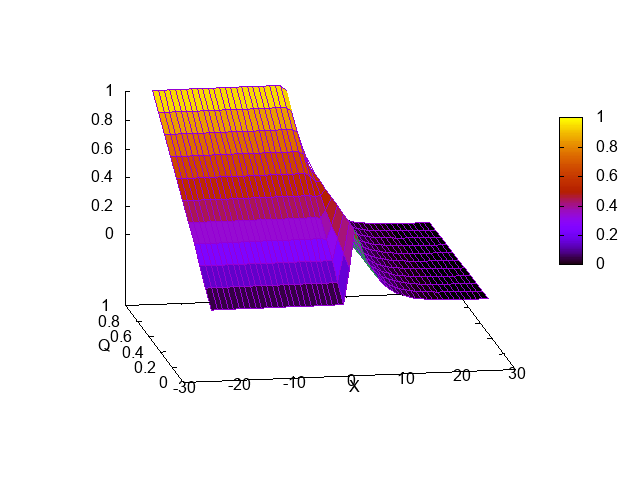

In [7]:
// plot the figure
{
    // add labels on the x/y axis
    std::stringstream ss("set view 70,350\n"
                         "set xlabel \" X \"\n"
                        "set ylabel \" Q \"\n"
                        "set hidden3d front \n"
                        "set pm3d\n");
    // put the plot in figure1
    MATH60082::figure = MATH60082::G.plotData3D(X,Q,v,&ss);
}
// show figure
MATH60082::figure

# Tasks

1. Try running the cells to solve region A and B a second, third (or more) time, what happens to the picture?
2. Run a loop around the code to run the solver $q$ times -- you should 